<a href="https://colab.research.google.com/github/matheustoneti/ClusteringBankDatabase/blob/main/Clustering_and_Predict_Bank_Client_Database.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import cluster
from yellowbrick.cluster.elbow import kelbow_visualizer
from yellowbrick.datasets.loaders import load_nfl
from sklearn.cluster import KMeans

In [36]:
dados = pd.read_csv('Bank Customer Churn Prediction.csv')

In [37]:
dados.head(10)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,15574012,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,15592531,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,15656148,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,15792365,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,15592389,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [48]:
dados['country'].value_counts()



France     5014
Germany    2509
Spain      2477
Name: country, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


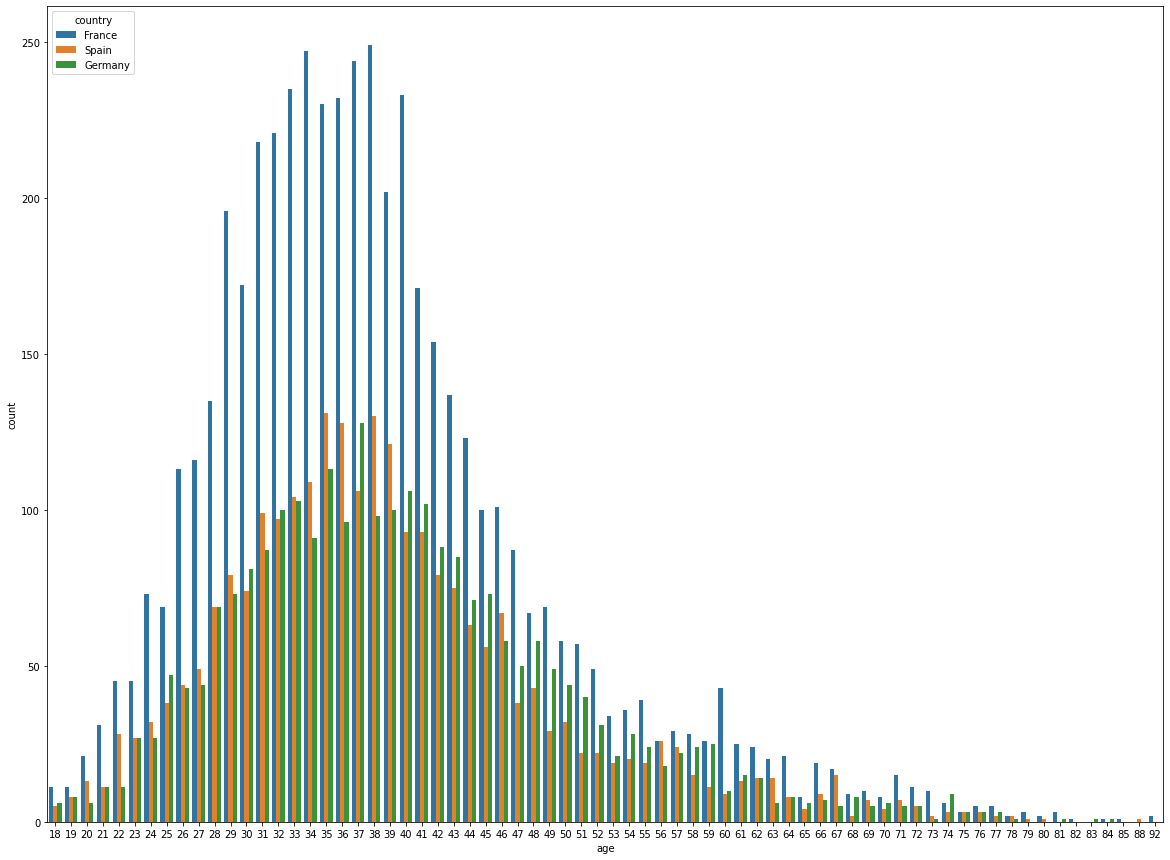

In [54]:
ax, fig = plt.subplots(figsize =(20,15))
ax = sns.countplot(dados['age'], hue= dados['country'])

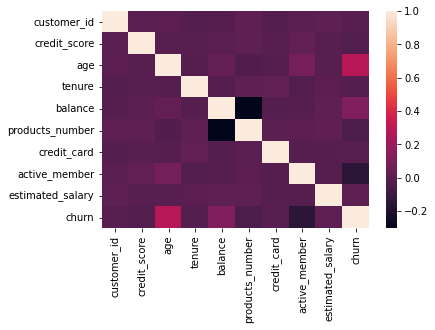

In [56]:
sns.heatmap(dados.corr())

In [60]:
dados.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [62]:
y = dados['churn']
x = dados.drop(['churn'], axis=1)

In [64]:
x.head(10)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
5,15574012,645,Spain,Male,44,8,113755.78,2,1,0,149756.71
6,15592531,822,France,Male,50,7,0.00,2,1,1,10062.80
7,15656148,376,Germany,Female,29,4,115046.74,4,1,0,119346.88
8,15792365,501,France,Male,44,4,142051.07,2,0,1,74940.50
9,15592389,684,France,Male,27,2,134603.88,1,1,1,71725.73


In [65]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [67]:
le = preprocessing.LabelEncoder()

In [70]:
x['country'] = le.fit_transform(x['country'])
x['gender'] = le.fit_transform(x['gender'])

In [71]:
x.head(10)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
0,15634602,619,0,0,42,2,0.00,1,1,1,101348.88
1,15647311,608,2,0,41,1,83807.86,1,0,1,112542.58
2,15619304,502,0,0,42,8,159660.80,3,1,0,113931.57
3,15701354,699,0,0,39,1,0.00,2,0,0,93826.63
4,15737888,850,2,0,43,2,125510.82,1,1,1,79084.10
5,15574012,645,2,1,44,8,113755.78,2,1,0,149756.71
6,15592531,822,0,1,50,7,0.00,2,1,1,10062.80
7,15656148,376,1,0,29,4,115046.74,4,1,0,119346.88
8,15792365,501,0,1,44,4,142051.07,2,0,1,74940.50
9,15592389,684,0,1,27,2,134603.88,1,1,1,71725.73


In [72]:
x_train, x_test, y_train, y_test = train_test_split (x,y, test_size = (0.3))

In [74]:
modelo = GradientBoostingClassifier()

In [76]:
modelo = modelo.fit(x_train, y_train)

In [77]:
accuracy = modelo.score(x_test, y_test)
print(accuracy)

0.8706666666666667


## Modelo com 87% de acurácia para previsão de clientes bancários

<function matplotlib.pyplot.show(*args, **kw)>

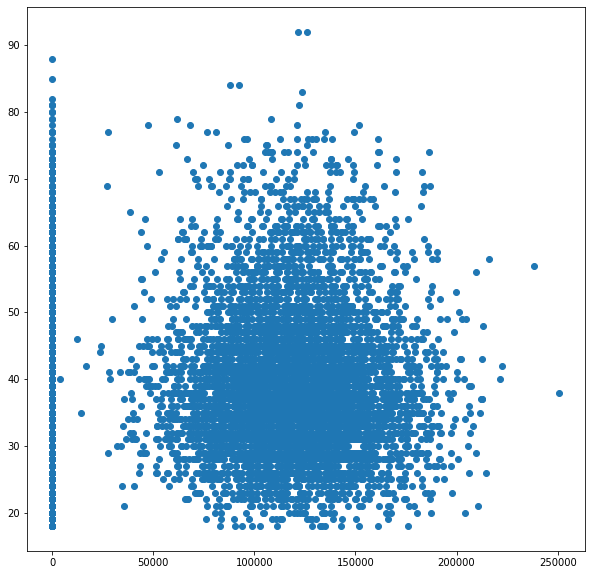

In [87]:
fig,axe = plt.subplots(figsize = (10,10))
axe = plt.scatter(x['balance'], x['age'])
plt.show

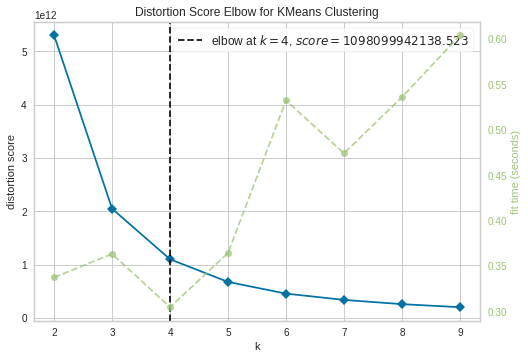

KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fdaff8a17d0>,
                 estimator=KMeans(n_clusters=9, random_state=4), k=(2, 10))

In [92]:
kelbow_visualizer(KMeans(random_state=4), x[['balance', 'age']], k=(2,10))

## Determinação de valor K = 4. Aplicação Método KMeans

In [93]:
kmeans = cluster.KMeans(4)
clusters = kmeans.fit_predict(x[['balance', 'age']])
pd.value_counts(clusters)

1    3658
2    2996
3    1812
0    1534
dtype: int64

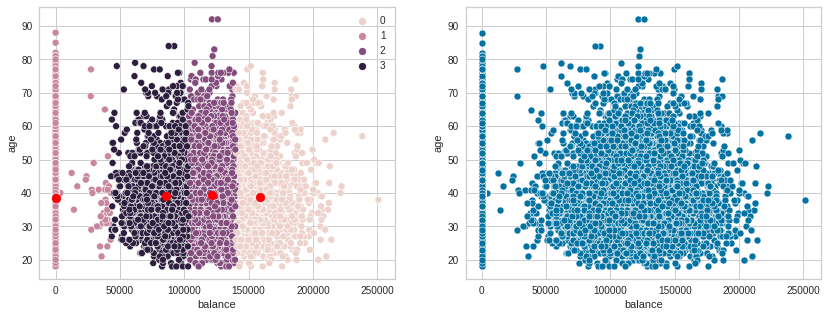

In [95]:
x_center, y_center = kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1]
fig, (axe1,axe2) = plt.subplots(1,2, figsize=(14,5))
sns.scatterplot (data = x, x='balance', y='age', hue= clusters, ax=axe1)
axe1.scatter(x=x_center, y=y_center, s=80, color='red')
sns.scatterplot( data=x, x='balance', y= 'age',  ax=axe2)